**Misael Vicente Alvarez Camarillo**

*2193035962*

In [1]:
# Importamos las librerias necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # Gráficas
plt.style.use('ggplot')

Recordemos que el objetivo es minimzar la función costo

$$J(\theta) = \dfrac{1}{2m}\sum_{i=1}^{m}(h_{\theta}x^{(i)}-y^{(i)})^{2}$$

Donde tenemos como hipotesis que:

$$h_{\theta}(x)=\theta^{T}X=\theta_{0}+\theta_{1}x$$

Una forma de minimzar la función costo es usar el descenso del gradiente, que esta dado por:

$$\theta_{j} := \theta_{j} - \alpha \dfrac{1}{m}\sum_{i=1}^{m}(h_{\theta}x^{(i)}-y^{(i)})x_{j}$$

## Regresión Lineal

In [2]:
# Cargamos los datos en un DataFrame, Los importdo desde Github para mayor movilidad / otra forma es localmente
df = pd.read_csv("https://raw.githubusercontent.com/Misael-Alvarez/EC-Tarea1/main/ex1data1.csv")
# Definimos nuestros datos del dataFrame
X = df["X"]
Y = df["Y"]
df

,X,Y
0,6.1101,17.59200
1,5.5277,9.13020
2,8.5186,13.66200
3,7.0032,11.85400
4,5.8598,6.82330
...,...,...
92,5.8707,7.20290
93,5.3054,1.98690
94,8.2934,0.14454
95,13.3940,9.05510


In [3]:
# definimos nuestra funcion PlotData
def plotData(x,y):
    plt.scatter(x,y,marker = "x", color="red", s = 20, alpha = 0.8)
    plt.title("Datos")
    plt.xlabel("Population of City in 10,000s")
    plt.ylabel("Profit in $10,000s")
    plt.show()
    return 

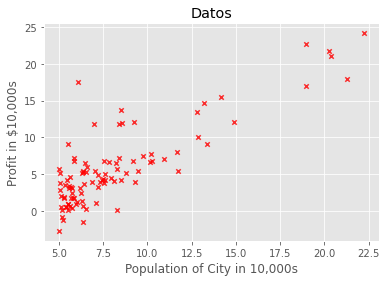

In [4]:
plotData(X,Y)

In [5]:
def h(a,b,x):
    return a*x+b

In [6]:
def gradiente_descendente(a_, b_, alpha, x, y):
    m = x.shape[0] # Numero de datos

    # Gradientes: derivadas de la función de error con respecto a los parametros a y b
    dw = -(2/m)*np.sum(x*(y-(h(a_,b_,X))))
    db = -(2/m)*np.sum(y-h(a_,b_,X))

    # Actualizar los pesos usando la fórmula del gradiente descendente
    a = a_ - alpha*dw
    b = b_ - alpha*db

    return a, b

In [7]:
def costo(y, GD=gradiente_descendente):
    m = Y.shape[0]
    n = 1500 # iteraciones para entrenar el modelo
    J = np.zeros((n,1)) 
    # Para inicializar nuestro modelo elegimos al azar los valores para a y b
    np.random.seed(2)
    a = np.random.randn(1)[0]
    b = np.random.randn(1)[0]
    # Entrenamos nuestra regresion
    for i in range(n):
        # Llamamos a nuestro gradiente
        [a, b] = GD(a,b,0.01,X,Y)
        # Obtenemos las thetas correspondientes
        J[i] = (np.sum((Y-h(a,b,X))**2))/m 
    res = [J,h(a,b,X)]
    return res

In [8]:
# El valor de nuestro vector J
print(costo(Y)[0])

[[62.44977575]
 [32.81121495]
 [20.4891591 ]
 ...
 [ 8.95399984]
 [ 8.95399943]
 [ 8.95399902]]


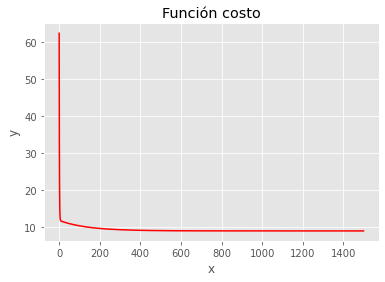

In [9]:
# Graficamos nuestra funcion de costo
def plotCosto(x,y):
    plt.plot(x,y, color="red")
    plt.title("Función costo")
    plt.xlabel("x")
    plt.ylabel("y")
    return plt.show()
n = 1500
plotCosto(range(n),costo(Y)[0])

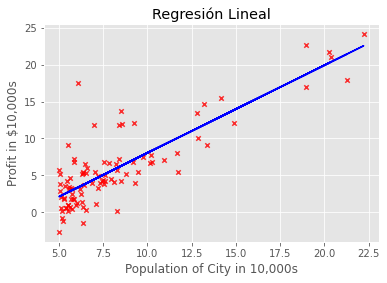

In [10]:
# Grafiquemos nuestra regresión Lineal
def regresionLineal(x,y):
    plt.scatter(x,y,marker = "x", color="red", s = 20, alpha = 0.8)
    plt.plot(x,costo(y)[1], color="blue")
    plt.title("Regresión Lineal")
    plt.xlabel("Population of City in 10,000s")
    plt.ylabel("Profit in $10,000s")
    plt.show()
regresionLineal(X,Y)

## 2.- Regresión Lineal Múltiple

In [11]:
# Cargamos los datos en un DataFrame 
df2 = pd.read_csv("https://raw.githubusercontent.com/Misael-Alvarez/EC-Tarea1/main/ex1data2.csv")
X2 = df2["Area"]
Y2 = df2["Recamaras"]
Z2 = df2["Precio"]
df2

,Area,Recamaras,Precio
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900
5,1985,4,299900
6,1534,3,314900
7,1427,3,198999
8,1380,3,212000
9,1494,3,242500


In [12]:
# Convertimos nuestros datos del dataFrame a arrays en numpy para mejor manipulacion
n = X2.shape[0]
v = np.zeros((n,2)) # Agrpamos los datos de area y recamaras pra despues usar featureNormalize mas eficiente
v2 = np.zeros((n,1)) # Dejamos el precio en otro array aparte
for i in range(n):
    v[i] = X2[i],Y2[i]
    v2[i] = Z2[i]

    
# Definimos nuestra función featureNormalize
def featureNormalize(v):
    v_norm = np.array(v)
    mu = np.mean(v, axis = 0) # axis=0 nos da el valor pedido de cada columna
    sigma = np.std(v, axis = 0) 
    v_norm = (v_norm - np.tile(mu, (v.shape[0],1)))/np.tile(sigma, (v.shape[0],1))
    return v_norm, mu, sigma


# Definimos nuestra función de costo
def computeCostMulti(X, Y, theta):
    m = Y.shape[0]
    J = np.sum((Y - np.dot(X, theta))**2) / (2 * m)
    return J


# Implementamos el descenso del gradiente
def gradientDescentMulti(X, Y, theta, alpha, iteraciones):
    m = Y.shape[0]
    Jtot = []
    
    for i in range(iteraciones):
        theta -= alpha / m * np.dot(X.T, (np.dot(X, theta) - Y))
        Jtot.append(computeCostMulti(X, Y, theta))
    return theta, Jtot


# Ecuación Normal
# theta = (X'X)^(-1)X'y
def normalEqn(X, Y):
    from numpy.linalg import inv
    return np.dot(np.dot(inv(np.dot(X.T, X)), X.T), Y)

In [13]:
# Aplicamos la funcion featureNormalize
x, mu, sigma = featureNormalize(v)
x = np.column_stack((np.ones((x.shape[0],1)), x))

In [14]:
# Definimos funciones para diferentes alpha
def regresionMulti(alpha, iteraciones):
    theta = np.zeros((x.shape[1],1))
    theta, Jtot = gradientDescentMulti(x, v2, theta, alpha, iteraciones)
    # Graficamos
    plt.plot(range(len(Jtot)), Jtot, color="red")
    plt.title("alpha = {} ".format(alpha))
    plt.xlabel("x")
    plt.ylabel("y")
    plt.show()
    return 

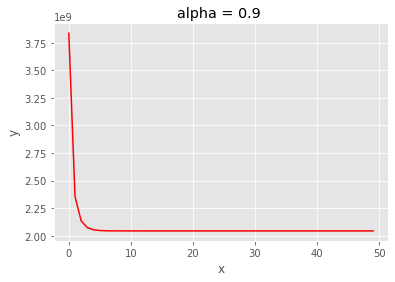

In [15]:
regresionMulti(0.9,50)

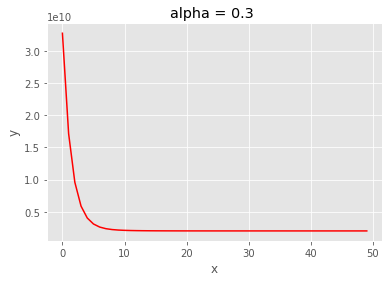

In [16]:
regresionMulti(0.3,50)

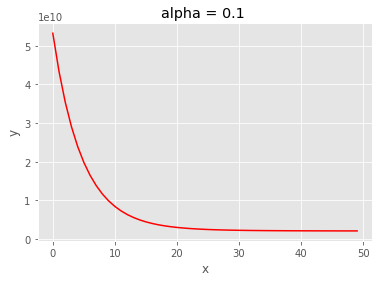

In [17]:
regresionMulti(0.1,50)

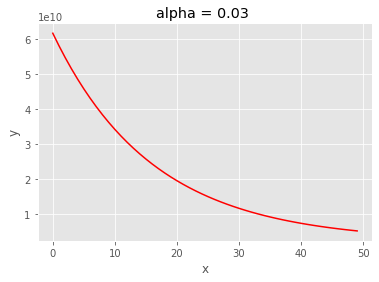

In [18]:
regresionMulti(0.03,50)

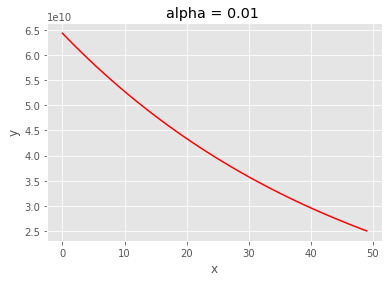

In [19]:
regresionMulti(0.01,50)

In [20]:
# Pronostico: Use los valores calculados de theta para predecir el valor de una casa de 1650 pies-cuadrados y 3 recámaras.
def Pronostico(X,Y):
    X = np.column_stack((np.ones((X.shape[0],1)),X))
    theta1 = normalEqn(X,Y)
    precio = np.dot(np.column_stack((np.array([[1]]), np.array([[1650, 3]]))), theta1)
    return print("El valor predecido de una casa de 1650 pies cuadrados y 3 recamaras es de: ${}".format(precio[0][0]))

In [21]:
Pronostico(v,v2)

El valor predecido de una casa de 1650 pies cuadrados y 3 recamaras es de: $293081.46433489496
